Сегментация изображений
---

Подключаемcя к Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Загрузим обучающую и тестовую выборки

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

def download_data(path):
  data = []
  for path_image in sorted(os.listdir(path=path)):
    image = Image.open(path + path_image) #Открываем изображение.
    data.append(np.array(image)[:640, :352]) #Загружаем пиксели.
  return data

X_train = download_data(r"./drive/My Drive/membrane/train/image/")
Y_train = download_data(r"./drive/My Drive/membrane/train/mask/")
X_test = download_data(r"./drive/My Drive/membrane/test/image/")
Y_test = download_data(r"./drive/My Drive/membrane/test/mask/")

Вывод примера исходного изображения

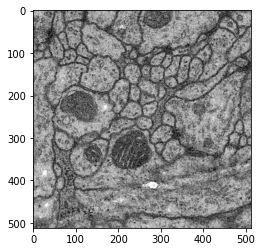

In [ ]:
I = 10 # номер изображения для вывода
plt.imshow(X_train[I], cmap='gray') # вывод изображения на экран

Вывод примера желаемого результата

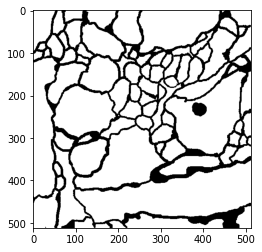

In [ ]:
I = 10 # номер изображения для вывода
plt.imshow(Y_train[I], cmap='gray') # вывод изображения на экран

Предварительная подготовка данных для обучения нейронной сети

In [ ]:
X_train_pred = np.array(X_train).reshape([30, 512, 512, 1])/255
Y_train_pred = np.array(Y_train).reshape([30, 512, 512, 1])/255

X_test_pred = np.array(X_test).reshape([30, 512, 512, 1])/255
Y_test_pred = np.array(Y_test).reshape([30, 512, 512, 1])/255

Объявление топологии нейронной сети

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(64, 5, input_shape=[512, 512, 1], activation = 'relu', padding = 'same'))
model.add(Conv2D(64, 5, activation = 'relu', padding = 'same'))
model.add(Conv2D(64, 5, activation = 'relu', padding = 'same'))
model.add(Conv2D(64, 5, activation = 'relu', padding = 'same'))
model.add(Conv2D(64, 5, activation = 'relu', padding = 'same'))
model.add(Conv2D(1, 1, activation = 'sigmoid'))
model.compile(optimizer = Adam(), loss = 'mse')

Обучение нейронной сети

In [ ]:
model.fit(X_train_pred, Y_train_pred, epochs=15, batch_size=1)

Epoch 1/15
30/30 [==============================] - 5s 179ms/step - loss: 0.1572
Epoch 2/15
30/30 [==============================] - 6s 185ms/step - loss: 0.1255
Epoch 3/15
30/30 [==============================] - 6s 185ms/step - loss: 0.1018
Epoch 4/15
30/30 [==============================] - 6s 185ms/step - loss: 0.1052
Epoch 5/15
30/30 [==============================] - 6s 185ms/step - loss: 0.0953
Epoch 6/15
30/30 [==============================] - 6s 185ms/step - loss: 0.0924
Epoch 7/15
30/30 [==============================] - 6s 185ms/step - loss: 0.0851
Epoch 8/15
30/30 [==============================] - 6s 185ms/step - loss: 0.0849
Epoch 9/15
30/30 [==============================] - 6s 185ms/step - loss: 0.0851
Epoch 10/15
30/30 [==============================] - 6s 185ms/step - loss: 0.0812
Epoch 11/15
30/30 [==============================] - 6s 185ms/step - loss: 0.0800
Epoch 12/15
30/30 [==============================] - 6s 185ms/step - loss: 0.0787
Epoch 13/15
30/30 [======

Тестирование нейронной сети

In [ ]:
print("MSE: ", model.evaluate(X_test_pred, Y_test_pred, batch_size=1))

30/30 [==============================] - 2s 58ms/step - loss: 0.1842
MSE:  0.18418502807617188


Запускаем нейронную сеть для сегментации изображений тестовой выборки

In [ ]:
out = model.predict(X_test_pred, batch_size=1)

Вывод предсказания нейронной сети для выбранного изображения

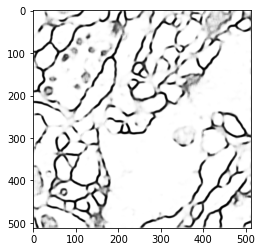

In [ ]:
I = 0 # номер картинки после обработки нейронной сетью
plt.imshow(out[I].reshape([512, 512]), cmap='gray')